In [ ]:
import pygame
pygame.init()


ModuleNotFoundError: ignored

In [ ]:
pygame.init()
screen=pygame.display.set_mode((400,300))
done = False

while not done:
  for event in pygame.event.get():
    if event.type==pygame.QUIT:
      done = True
  pygame.display.flip()



NameError: ignored

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
dicevalues=[1,2,3,4,8]
gattalist=[(2,0),(4,2),(2,4),(0,2),(2,2)]
inner_x=[1,2,3]
inner_y=[1,2,3]

In [ ]:
class ChowkaBaara():

  def __init__(self,player1,player2,player3,player4):
    print("lets play")
    self.playerlist=[player1,player2,player3,player4]
    B=Board()
    L=[0,0,0,0]
    (L[0],L[1],L[2],L[3])=B.initialLocations()
    for i in range(4):
      self.playerlist[i].pawnlocations=L[i]
    #print(self.player1.pawnlocations)
    print(Board.showBoard(self.playerlist))

  #Has to be changed to encorporate gatti
  def validateAction(self,playerno,xnew,ynew):
    if xnew==-1 or ynew==-1:
      return -1
    if xnew in inner_x and ynew in inner_y:
      if self.playerlist[playerno].kill==0:
        return -1
    if (xnew,ynew) in gattalist:
      return 1
    if (xnew,ynew) in self.playerlist[playerno].pawnlocations:
      return -1
    return 1

  def returnPossibleActions(self,player,playerno,count):
    actionlist=[]
    for pawn in range(4):
      B=Board()
      #print(playerno,player.pawnlocations[pawn][0],player.pawnlocations[pawn][1],count)
      (xnew,ynew)=B.move(playerno,player.pawnlocations[pawn][0],player.pawnlocations[pawn][1],count)
      valid=self.validateAction(playerno,xnew,ynew)
      if valid==1:
        actionlist.append((player.pawnlocations[pawn][0],player.pawnlocations[pawn][1],xnew,ynew))
      #print(actionlist)
    return actionlist

#(xold,yold,xnew,ynew) is action

  def doAction(self,playerno,action):
    xold=action[0]
    yold=action[1]
    xnew=action[2]
    ynew=action[3]
    for pawn in range(4):
      if self.playerlist[playerno].pawnlocations[pawn]==(xold,yold):
        self.playerlist[playerno].pawnlocations[pawn]=(xnew,ynew)
        if (xnew,ynew)==(2,2):
          self.playerlist[playerno].points+=1
          return 0
        if (xnew,ynew) in gattalist:
          return 0
        listi=[0,1,2,3]
        listi.remove(playerno)
        for l in listi:
          for p in range(4):
            if self.playerlist[l].pawnlocations[pawn]==(xnew,ynew):
              self.playerlist[playerno].kill=1
              self.playerlist[l].pawnlocations[p]=gattalist[l]
              return 1
        return 0
    return 0    

      





  def play(self):
    while(1):
      for playerno in range(4):
        print(" It is ",self.playerlist[playerno].name,"'s chance to play")
        dice=np.random.choice(dicevalues,1)[0]
        print(self.playerlist[playerno].name," gets a ",dice)
        actionlist=[]
        actionlist=self.returnPossibleActions(self.playerlist[playerno],playerno,dice)
        B=Board()
        if actionlist==[]:
          print("No move possible")
          print("Current state of board is")
          print(Board.showBoard(self.playerlist))
        else:
          action=self.playerlist[playerno].chooseAction()
          print(actionlist)
          while action not in actionlist:
            print("Invalid move, Please choose action again")
            action=self.playerlist[playerno].chooseAction()
          x=self.doAction(playerno,action)


          print("Current state of board is")
          print(Board.showBoard(self.playerlist))

          if self.playerlist[playerno].points==4:
            print(self.playerlist[playerno].name,"is the winner!! Congo ma dost")
            return playerno

          while x==1:
            print(self.playerlist[playerno].name," went for the kill")
            print(" It is ",self.playerlist[playerno].name,"'s chance to play")


            dice=np.random.choice(dicevalues,1)[0]
            print(self.playerlist[playerno].name," gets a ",dice)
            actionlist=self.returnPossibleActions(self.playerlist[playerno],playerno,dice)
            B=Board()

            if actionlist==[]:
              print("No move possible")
              print("Current state of board is")
              print(Board.showBoard(self.playerlist))
            else:
              action=self.playerlist[playerno].chooseAction()
              while action not in actionlist:
                print("Invalid move, Please choose action again")
                action=self.playerlist[playerno].chooseAction()
              x=self.doAction(playerno,action)
              print("Current state of board is")
              print(Board.showBoard(self.playerlist))


     
          





In [ ]:
class Player():
  def __init__(self,name,pawnlocations=None):
    self.name=name
    self.pawnlocations=pawnlocations
    self.kill=0
    self.points=0
  

  
#do action


In [ ]:
class HumanPlayer(Player):
  def chooseAction(self):
    print("Dear ",self.name," Please decide action")
    inside=input()
    action=(int(inside[0]),int(inside[1]),int(inside[2]),int(inside[3]))
    return action

In [ ]:
class Board():

  def initialLocations(self):
    initiallocation1=[]
    initiallocation2=[]
    initiallocation3=[]
    initiallocation4=[]

    for j in range(4):
      initiallocation1.append((2,0))
      initiallocation2.append((4,2))
      initiallocation3.append((2,4))
      initiallocation4.append((0,2))
    return (initiallocation1,initiallocation2,initiallocation3,initiallocation4)




  def showBoard(playerlist):

    #Getting basic setup of board
    fig, ax = plt.subplots()

    ax.set_ylim(0, 5)
    ax.set_xlim(0, 5)
    ax.grid(True)
    ax.set_xlabel('x-axis')
    ax.set_ylabel('y-axis')


    x= np.arange(2,3,0.01)
    y3=1
    y4=0
    plt.fill_between(x, y3, y4, color='red', alpha=0.1)
    #ax.scatter(0.5,0.5,color='red',marker='v')

    x= np.arange(4,5,0.01)
    y3=2
    y4=3
    plt.fill_between(x, y3, y4, color='blue', alpha=0.1)
    #ax.scatter(4.5,0.5,color='blue',marker='o')

    x= np.arange(2,3,0.01)
    y3=5
    y4=4
    plt.fill_between(x, y3, y4, color='green', alpha=0.1)
    #ax.scatter(4.5,4.5,color='green',marker='s')

    x= np.arange(0,1,0.01)
    y3=2
    y4=3
    plt.fill_between(x, y3, y4, color='purple', alpha=0.1)
    #ax.scatter(0.5,4.5,color='purple',marker='D')

    x=np.arange(2,3,0.01)
    y3=2
    y4=3
    plt.fill_between(x, y3, y4, color='yellow', alpha=0.1)

    #Plotting the pawns
    colorlist=['red','blue','green','purple']
    markerlist=['v','o','s','D']
    for playerno in range(4):
      for pawn in range(4):
        n=playerlist[playerno].pawnlocations[pawn][0]
        m=playerlist[playerno].pawnlocations[pawn][1]
        ax.scatter(0.125+n+(0.25)*playerno,0.125+m+(0.25)*pawn,color=colorlist[playerno],marker=markerlist[playerno])
    plt.figure()
    plt.show()

    
  def moveOne(self,playerno,x,y):

    if (x,y)==(2,2):
      return (-1,-1)

    if y==0 and x!=4:
      if playerno==0 and x==1:
        return (x,1)
      else:
        return (x+1,0)
    if x==4 and y!=4:
      if playerno==1 and y==1:
        return (x-1,1)
      else:
        return (x,y+1)
    if y==4 and x!=0:
      if playerno==2 and x==3:
        return (x,y-1)
      else:
        return (x-1,y)
    if x==0 and y!=0:
      if playerno==3 and y==3:
        return (x+1,y)
      else:
        return (x,y-1)


    if y==1 and x!=3:
      if playerno==0 and x==2:
        return (2,2)
      else:
        return (x+1,0)
    if x==3 and y!=3:
      if playerno==1 and y==2:
        return (2,2)
      else:
        return (x,y+1)
    if y==3 and x!=1:
      if playerno==2 and x==2:
        return (2,2)
      else:
        return (x-1,y)
    if x==1 and y!=1:
      if playerno==3 and y==2:
        return (2,2)
      else:
        return (x,y-1)
    
  def move(self,playerno,x,y,count):
    x1=x
    y1=y
    for i in range(count):
      (xnew,ynew)=self.moveOne(playerno,x1,y1)
      #print(xnew,ynew)
      if(xnew,ynew)==(-1,-1):
        return (-1,-1)
      (x1,y1)=(xnew,ynew)
    return (xnew,ynew)
      



In [ ]:
P1=HumanPlayer('A')
P2=HumanPlayer('B')
P3=HumanPlayer('C')
P4=HumanPlayer('D')

lets play


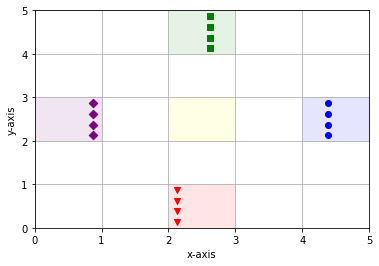

<Figure size 432x288 with 0 Axes>

None


In [ ]:
c=ChowkaBaara(P1,P2,P3,P4)

 It is  A 's chance to play
A  gets a  1
Dear  A  Please decide action
2030
[(2, 0, 3, 0), (2, 0, 3, 0), (2, 0, 3, 0), (2, 0, 3, 0)]
Current state of board is


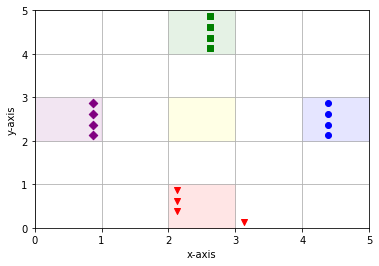

<Figure size 432x288 with 0 Axes>

None
 It is  B 's chance to play
B  gets a  8
Dear  B  Please decide action
4202
[(4, 2, 0, 2), (4, 2, 0, 2), (4, 2, 0, 2), (4, 2, 0, 2)]
Current state of board is


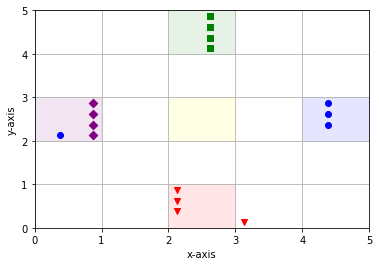

<Figure size 432x288 with 0 Axes>

None
 It is  C 's chance to play
C  gets a  4
Dear  C  Please decide action
0954
[(2, 4, 0, 2), (2, 4, 0, 2), (2, 4, 0, 2), (2, 4, 0, 2)]
Invalid move, Please choose action again
Dear  C  Please decide action
end


ValueError: ignored

In [ ]:
c.play()
